In [ ]:
# ------------------------
# 📦 1. Import Libraries
# ------------------------
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt


import gensim
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt_tab')

import warnings
warnings.filterwarnings('ignore')

C:\Users\16096\Documents\KAJAL\Semester2\Data Wrangling\Projects-HW\dwproj_new\Lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\16096\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
# ------------------------
# ⚙️ 2. Define Functions
# ------------------------

# Function to preprocess reviews (tokenize, clean, remove stopwords, lemmatize)
def preprocess_reviews(reviews, sample_size=None):
    print("Preprocessing reviews...")
    
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    if sample_size:
        reviews = random.sample(list(reviews), sample_size)
        print(f"Sampled {sample_size} reviews for faster processing.")

    processed_reviews = []

    for review in reviews:
        if pd.isnull(review):
            continue
        # Basic cleaning
        review = re.sub(r'[^a-zA-Z]', ' ', review)
        review = review.lower()
        words = word_tokenize(review)
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 2]
        processed_reviews.append(words)

    print(f"Completed preprocessing {len(processed_reviews)} reviews.")
    return processed_reviews


In [3]:
# Function to build LDA model
def build_lda_model(processed_reviews, num_topics):
    dictionary = corpora.Dictionary(processed_reviews)
    corpus = [dictionary.doc2bow(text) for text in processed_reviews]
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)
    return lda_model, corpus, dictionary



In [4]:
# Function to compute coherence values for different number of topics
def compute_coherence_values(processed_reviews, start=2, limit=10, step=1):
    print("Computing coherence scores...")
    coherence_scores = []
    models = []

    for num_topics in range(start, limit + 1, step):
        print(f"Training LDA with {num_topics} topics...")
        model, corpus, dictionary = build_lda_model(processed_reviews, num_topics)
        coherence_model = CoherenceModel(model=model, texts=processed_reviews, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append((num_topics, coherence_score))
        models.append((num_topics, model, corpus, dictionary))

    print("Completed coherence score calculation.")
    return coherence_scores, models

In [5]:
# Function to plot coherence scores
def plot_coherence_scores(coherence_scores, app_name):
    topics, scores = zip(*coherence_scores)
    plt.figure(figsize=(8, 5))
    plt.plot(topics, scores, marker='o')
    plt.title(f'Coherence Score vs Number of Topics for {app_name}')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.grid()
    plt.show()

In [6]:
# # Function to visualize topics using pyLDAvis
# def visualize_topics_pyldavis(model, corpus, dictionary, app_name):
#     print(f"Preparing pyLDAvis visualization for {app_name}...")
#     vis = gensimvis.prepare(model, corpus, dictionary)
#     pyLDAvis.display(vis)

def visualize_topics_pyldavis(model, corpus, dictionary, app_name):
    print(f"Preparing pyLDAvis visualization for {app_name}...")
    vis = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
    
    pyLDAvis.save_html(vis, f"{app_name}_topics.html")
    print(f"Saved pyLDAvis visualization to {app_name}_topics.html 🚀")


In [7]:
# ------------------------
# 🚀 3. Main Execution Flow
# ------------------------

# Example: Load your dataset
# (replace this with your actual dataframe)
df = pd.read_csv('../aggregated_data/combined_review_data_with_sentiment.csv')
print(df.shape)
df.head()

(126725, 8)


,review,review_datetime,data_source,app_name,upvote_count,total_comments,app_rating,sentiment
0,uber eats for owls? will they ever come out wi...,2025-04-20 21:51:15,Reddit,UberEats,1.0,2.0,NaN,Neutral
1,serious question yall is it worth going out to...,2025-04-20 21:41:21,Reddit,UberEats,1.0,1.0,NaN,Neutral
2,ubereats charged me for a successful chargebac...,2025-04-20 20:50:04,Reddit,UberEats,1.0,2.0,NaN,Negative
3,ubereats driver scammed me by buying half the ...,2025-04-20 20:48:13,Reddit,UberEats,1.0,9.0,NaN,Negative
4,ubereats why you do this? family went out of t...,2025-04-20 20:19:15,Reddit,UberEats,1.0,3.0,NaN,Negative


In [8]:
unique_apps = df['app_name'].unique()
print(f"Found {len(unique_apps)} unique apps: {', '.join(unique_apps)}")

Found 3 unique apps: UberEats, DoorDash, GrubHub


## Coherence Score vs Number of Topics


Processing app: UberEats
Preprocessing reviews...
Completed preprocessing 64153 reviews.
Computing coherence scores...
Training LDA with 2 topics...
Training LDA with 3 topics...
Training LDA with 4 topics...
Training LDA with 5 topics...
Training LDA with 6 topics...
Training LDA with 7 topics...
Training LDA with 8 topics...
Training LDA with 9 topics...
Training LDA with 10 topics...
Training LDA with 11 topics...
Training LDA with 12 topics...
Training LDA with 13 topics...
Training LDA with 14 topics...
Training LDA with 15 topics...
Training LDA with 16 topics...
Training LDA with 17 topics...
Training LDA with 18 topics...
Training LDA with 19 topics...
Training LDA with 20 topics...
Completed coherence score calculation.


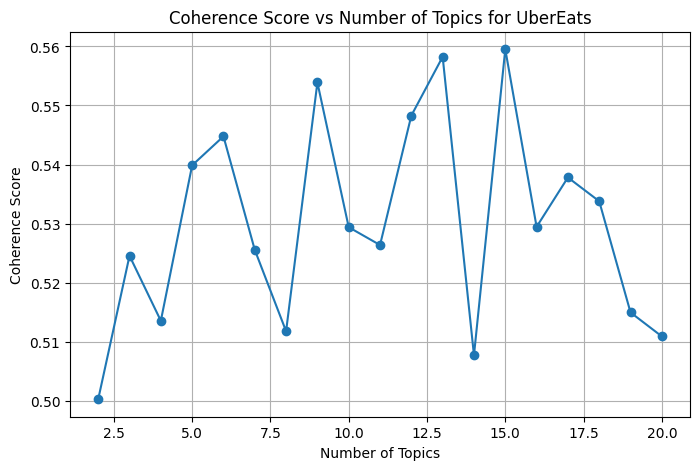

Best number of topics for UberEats: 15 with coherence score 0.5595
Preparing pyLDAvis visualization for UberEats...
Saved pyLDAvis visualization to UberEats_topics.html 🚀

Processing app: DoorDash
Preprocessing reviews...
Completed preprocessing 53719 reviews.
Computing coherence scores...
Training LDA with 2 topics...
Training LDA with 3 topics...
Training LDA with 4 topics...
Training LDA with 5 topics...
Training LDA with 6 topics...
Training LDA with 7 topics...
Training LDA with 8 topics...
Training LDA with 9 topics...
Training LDA with 10 topics...
Training LDA with 11 topics...
Training LDA with 12 topics...
Training LDA with 13 topics...
Training LDA with 14 topics...
Training LDA with 15 topics...
Training LDA with 16 topics...
Training LDA with 17 topics...
Training LDA with 18 topics...
Training LDA with 19 topics...
Training LDA with 20 topics...
Completed coherence score calculation.


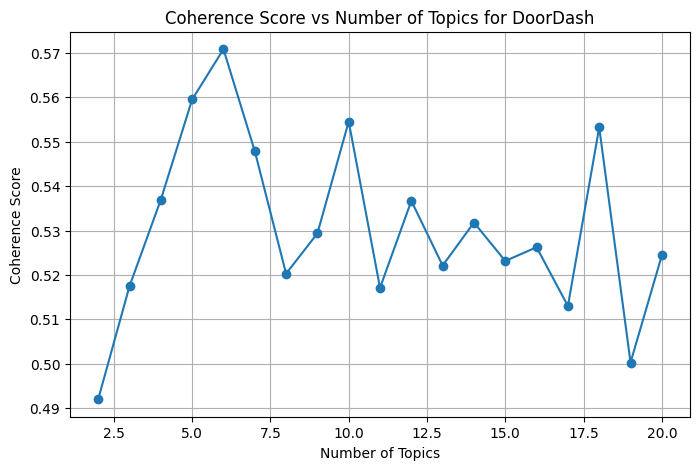

Best number of topics for DoorDash: 6 with coherence score 0.5708
Preparing pyLDAvis visualization for DoorDash...
Saved pyLDAvis visualization to DoorDash_topics.html 🚀

Processing app: GrubHub
Preprocessing reviews...
Completed preprocessing 8844 reviews.
Computing coherence scores...
Training LDA with 2 topics...
Training LDA with 3 topics...
Training LDA with 4 topics...
Training LDA with 5 topics...
Training LDA with 6 topics...
Training LDA with 7 topics...
Training LDA with 8 topics...
Training LDA with 9 topics...
Training LDA with 10 topics...
Training LDA with 11 topics...
Training LDA with 12 topics...
Training LDA with 13 topics...
Training LDA with 14 topics...
Training LDA with 15 topics...
Training LDA with 16 topics...
Training LDA with 17 topics...
Training LDA with 18 topics...
Training LDA with 19 topics...
Training LDA with 20 topics...
Completed coherence score calculation.


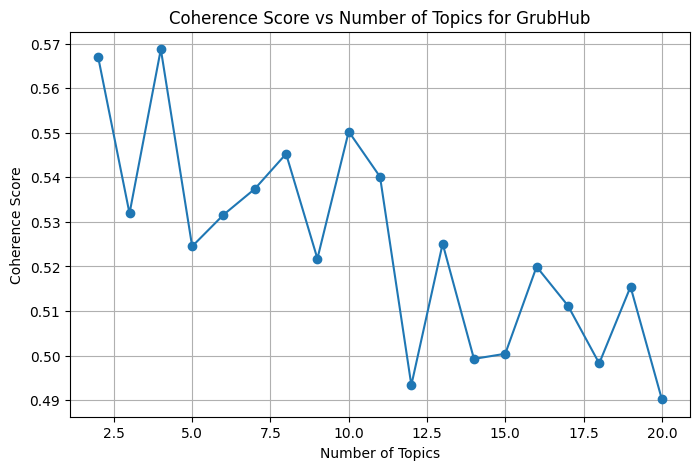

Best number of topics for GrubHub: 4 with coherence score 0.5687
Preparing pyLDAvis visualization for GrubHub...
Saved pyLDAvis visualization to GrubHub_topics.html 🚀

✅ All Apps Processed Successfully!


In [ ]:
#| echo: true
for app in unique_apps:
    print(f"\nProcessing app: {app}")
    app_reviews = df[df['app_name'] == app]['review']

    processed_reviews = preprocess_reviews(app_reviews)
    #print(len(processed_reviews))
    coherence_scores, models = compute_coherence_values(processed_reviews, start=2, limit=20, step=1)
    plot_coherence_scores(coherence_scores, app_name=app)

    best_num_topics, best_score = max(coherence_scores, key=lambda x: x[1])
    print(f"Best number of topics for {app}: {best_num_topics} with coherence score {best_score:.4f}")

    for num, model, corpus, dictionary in models:
        if num == best_num_topics:
            best_model, best_corpus, best_dictionary = model, corpus, dictionary
            break

    visualize_topics_pyldavis(best_model, best_corpus, best_dictionary, app_name=app)

print("\n✅ All Apps Processed Successfully!")